In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Read CSVs
Pyber_ridesdata= pd.read_csv('/Users/rulaothman/Desktop/MatplotlibChallenge/Pyber/raw_data/ride_data.csv')
Pyber_citydata= pd.read_csv('/Users/rulaothman/Desktop/MatplotlibChallenge/Pyber/raw_data/city_data.csv')

#Merge DataFrames
Pyber_data = pd.merge(Pyber_ridesdata, Pyber_citydata)
Pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


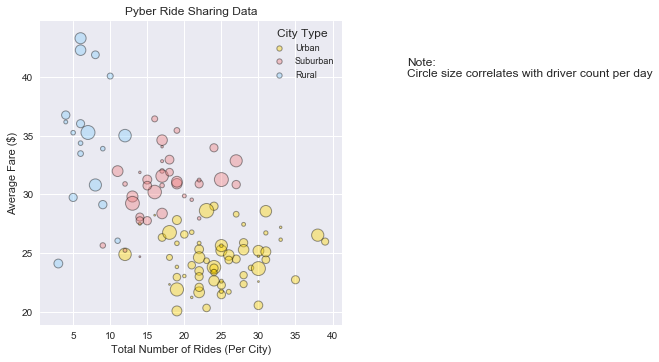

In [10]:
#Create Bubble Plots 
average_fare=Pyber_data.groupby('city').mean()
total_ride = Pyber_data.groupby('city').count()
nondup_citydata= Pyber_data.drop_duplicates('city').set_index('city')

bubble_data= {'Average Fare': average_fare['fare'],
             'Total Ride': total_ride['ride_id'],
             'Total Driver': nondup_citydata['driver_count'],
             'City Type': nondup_citydata['type']}
bubble_data = pd.DataFrame(bubble_data).reset_index()

#Pybar Color Scheme 

colors = ['gold', 'lightcoral', 'lightskyblue']

#Plot Bubbles
sns.set()
sns.lmplot(x='Total Ride', y='Average Fare', hue='City Type', data=bubble_data, fit_reg=False, legend_out=False, scatter_kws={"s": bubble_data['Total Driver']*3, 'alpha':0.4, 'linewidth':1, 'edgecolors':"black"}, palette=colors)

plt.legend(fontsize='9', title='City Type', markerscale=0.5) 
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.text(50, 40, "Note:\nCircle size correlates with driver count per day", ha='left')

plt.show()

In [11]:
#Create Pie Charts 

def create_pie(title = 'Title', **kwargs):
    labels = ["Urban", "Suburban", "Rural"]
    colors = ['gold', 'lightcoral', 'lightskyblue']
    explode = (0.1,0,0)
    sizes = [kwargs['Urban'], kwargs['Suburban'], kwargs ['Rural']]
    
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250)
    
    plt.axis("equal")
    plt.title(title)
    
    plt.show()
    

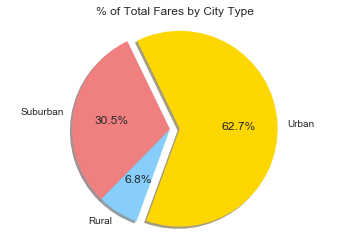

In [12]:
#Total Fares 

Urban = Pyber_data[Pyber_data['type']=='Urban'].sum()
Suburban = Pyber_data[Pyber_data['type']=='Suburban'].sum()
Rural = Pyber_data[Pyber_data['type']=='Rural'].sum()
create_pie(title="% of Total Fares by City Type", Urban=Urban['fare'], Suburban=Suburban['fare'], Rural=Rural['fare'])


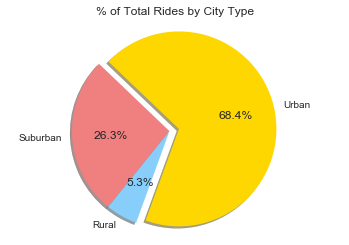

In [13]:
#Total Rides 

Urban = Pyber_data[Pyber_data['type']=='Urban'].count()
Suburban = Pyber_data[Pyber_data['type']=='Suburban'].count()
Rural = Pyber_data[Pyber_data['type']=='Rural'].count()
create_pie(title="% of Total Rides by City Type", Urban=Urban['fare'], Suburban=Suburban['fare'], Rural=Rural['fare'])

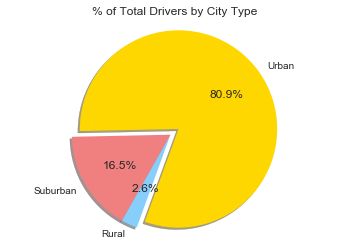

In [14]:
#Total Drivers 
Urban = Pyber_data[Pyber_data['type']=='Urban'].drop_duplicates('city').set_index('city').sum()
Suburban = Pyber_data[Pyber_data['type']=='Suburban'].drop_duplicates('city').set_index('city').sum()
Rural = Pyber_data[Pyber_data['type']=='Rural'].drop_duplicates('city').set_index('city').sum()

create_pie(title="% of Total Drivers by City Type", Urban=Urban['driver_count'], Suburban=Suburban['driver_count'], Rural=Rural['driver_count'])